In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib notebook

In [2]:
avail = pd.read_csv("cities_with_all_interests_crimes.csv")
avail.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year,# point of interest,crime counts
0,27402246,171503602,0,0,f,1.0,"Los Angeles, CA, United States",Echo Park,Echo Park,City of Los Angeles,...,100.0,10.0,10.0,10.0,10.0,0.19,47879.0,2019.0,19.0,2740.0
1,5627346,9355137,within an hour,100%,f,2.0,"Los Angeles, CA, United States",Cahuenga Pass,Hollywood Hills,City of Los Angeles,...,98.0,10.0,10.0,10.0,10.0,0.16,47879.0,2019.0,20.0,0.0
2,39090938,299617303,within an hour,100%,f,0.0,"Los Angeles, CA, United States",Mid-Wilshire,East Hollywood,City of Los Angeles,...,93.0,9.0,9.0,10.0,9.0,1.70,47879.0,2019.0,20.0,2234.0
3,20678163,4271811,0,0,f,2.0,"Los Angeles, CA, United States",Mar Vista,Mar Vista,City of Los Angeles,...,95.0,10.0,10.0,10.0,10.0,0.26,47879.0,2019.0,8.0,0.0
4,5299075,3118435,within a few hours,93%,f,9.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,87.0,9.0,9.0,10.0,9.0,0.97,7166.0,2019.0,20.0,0.0


In [3]:
avail = avail[["city", "price", "availability_30", ]]
avail.head(10)

,city,price,availability_30
0,Los Angeles,85.0,0
1,Los Angeles,69.0,4
2,Los Angeles,150.0,3
3,Los Angeles,81.0,0
4,Santa Monica,94.0,30
5,Los Angeles,225.0,2
6,Los Angeles,60.0,10
7,Los Angeles,58.0,0
8,Burbank,298.0,10
9,Los Angeles,65.0,22


In [4]:
avail["percent_occupied"] = (30 - avail["availability_30"]) / 30
#avail["percent_occupied"] = avail["percent_occupied"].map("{:.2%}".format)
avail.head(10)

,city,price,availability_30,percent_occupied
0,Los Angeles,85.0,0,1.000000
1,Los Angeles,69.0,4,0.866667
2,Los Angeles,150.0,3,0.900000
3,Los Angeles,81.0,0,1.000000
4,Santa Monica,94.0,30,0.000000
5,Los Angeles,225.0,2,0.933333
6,Los Angeles,60.0,10,0.666667
7,Los Angeles,58.0,0,1.000000
8,Burbank,298.0,10,0.666667
9,Los Angeles,65.0,22,0.266667


In [5]:
avail["percent_occupied"].dtypes

dtype('float64')

In [6]:
grp_avail = avail.groupby(["city"]).sum()
grp_avail

,price,availability_30,percent_occupied
city,,,
Alhambra,862.0,63,6.900000
Beverly Hills,1720.0,181,4.966667
Burbank,1879.0,174,13.200000
Glendale,2631.0,254,15.533333
Inglewood,1110.0,167,10.433333
Long Beach,6834.0,529,42.366667
Los Angeles,89740.0,7350,519.000000
Pasadena,3053.0,351,11.300000
Santa Monica,5956.0,546,23.800000


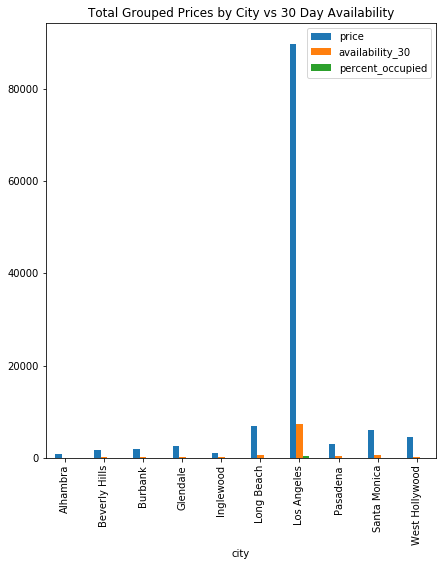

In [7]:
multi_plot = grp_avail.plot(kind="bar", figsize=(7,8))
plt.title("Total Grouped Prices by City vs 30 Day Availability")
plt.show
plt.savefig("bar chart.png")

<function matplotlib.pyplot.show(*args, **kw)>

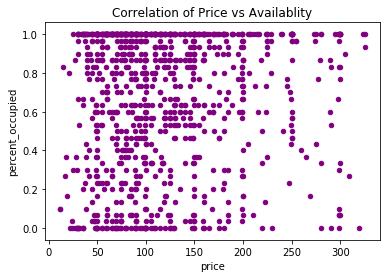

In [8]:
avail.plot.scatter(x="price", y="percent_occupied",color="purple")
plt.title("Correlation of Price vs Availablity")
plt.show

In [9]:
price = avail.iloc[:,1]
percent = avail.iloc[:,3]
correlation = st.pearsonr(price,percent)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.06


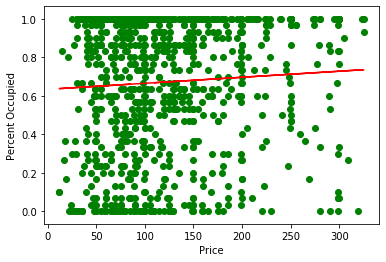

<Figure size 432x288 with 0 Axes>

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(price, percent)
regress_values = price * slope + intercept
plt.scatter(price, percent,color="green")
plt.plot(price, regress_values,"r-")
plt.xlabel("Price")
plt.ylabel("Percent Occupied")
plt.show()
plt.savefig("percent occupied.png")